## Présentation du projet : classification de scènes naturelles

Le jeu de données, à utiliser, est **Intel Image Classification** disponible sur la plateforme Kaggle.

Il contient environ 25k images réparties en six(6) catégories:
- Buildings (bâtiments)
- Forest (forêt)
- Glacier
- Mountain (montagnes)
- Sea (mer)
- Street (rue)

L'objectif est de classifier ces images à l'aide des algorithmes de Deep Learning pour des fins organisationnels, business, analystiques, etc.




## Préparation des données

L'objectif est de préparer les images pour servir à l'entrainement du modèle de Deep Learning.

### Chargement et exploration du jeu de données

In [1]:
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


Le code ci-dessous, permet d'afficher de voir quelques chemins des fichiers qui contiennent les images.

In [2]:
number_display = 10
count = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if(count< number_display):
            print(os.path.join(dirname, filename))
            count = count +1

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/771.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12167.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17643.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6560.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10162.jpg


#### Variable des chemins des dossiers du jeu de données

In [6]:
# Pour l'entrainement 
train_path = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_path  = "/kaggle/input/intel-image-classification/seg_test/seg_test"

# Pour la prédiction
pred_path   = "/kaggle/input/intel-image-classification/seg_pred/seg_pred"

- Train_path contient les jeux de données pour entrainer le modèle.
- Test_path contient les jeux de données pour valider l'apprentissage du modèle.
- Pred_path contient les jeux de données pour la prédiction finale.

#### Répartition des données dans le jeu de données

Nous allons effectuer une exploration qui nous permet de connaitre le nombre d'éléments par catégories et voir la taille de chaque image.

In [3]:
import glob as gb
import cv2

In [4]:
def read_path(path):
    for folder in os.listdir(path):
        files = gb.glob(os.path.join(path, folder, '*.jpg'))
        print(f'{folder} : {len(files)}')

In [7]:
read_path(train_path) 

mountain : 2512
street : 2382
buildings : 2191
sea : 2274
forest : 2271
glacier : 2404


In [9]:
read_path(test_path)

mountain : 525
street : 501
buildings : 437
sea : 510
forest : 474
glacier : 553


In [10]:
count = 0
for folder in os.listdir(pred_path):
    files = gb.glob(os.path.join(pred_path, folder, '*.jpg'))
    count = count + 1
    
print(f'Nombre de fichier : {count}')

Nombre de fichier : 7301


### Pré-traitement des images

In [21]:
# Permet de visualiser la taille des images dans les dossiers
def size_img(path):
    size = []
    
    for folder in os.listdir(path):
        files = gb.glob(os.path.join(path, folder, "*.jpg"))
        for file in files:
            image = plt.imread(file)
            size.append(image.shape)
            
    return size

In [23]:
size = size_img(train_path)
print(pd.Series(size).value_counts())

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(144, 150, 3)        2
(143, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(136, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(100, 150, 3)        1
(141, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(147, 150, 3)        1
(131, 150, 3)        1
(81, 150, 3)         1
(140, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(149, 150, 3)        1
(110, 150, 3)        1
(105, 150, 3)        1
(97, 150, 3)         1
(120, 150, 3)        1
(76, 150, 3)         1
(119, 150, 3)        1
(102, 150, 3)        1
Name: count, dtype: int64


In [24]:
size = size_img(test_path)
print(pd.Series(size).value_counts())

(150, 150, 3)    2993
(81, 150, 3)        1
(131, 150, 3)       1
(141, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(72, 150, 3)        1
Name: count, dtype: int64


#### Redimension les données

In [26]:
import tensorflow as tf
img_size = (150, 150)  # Redimensionner les images à 500x500
batch_size = 32  # pour charger des données par lots 

# Datasets train et validation (test)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes :", class_names)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Classes : ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


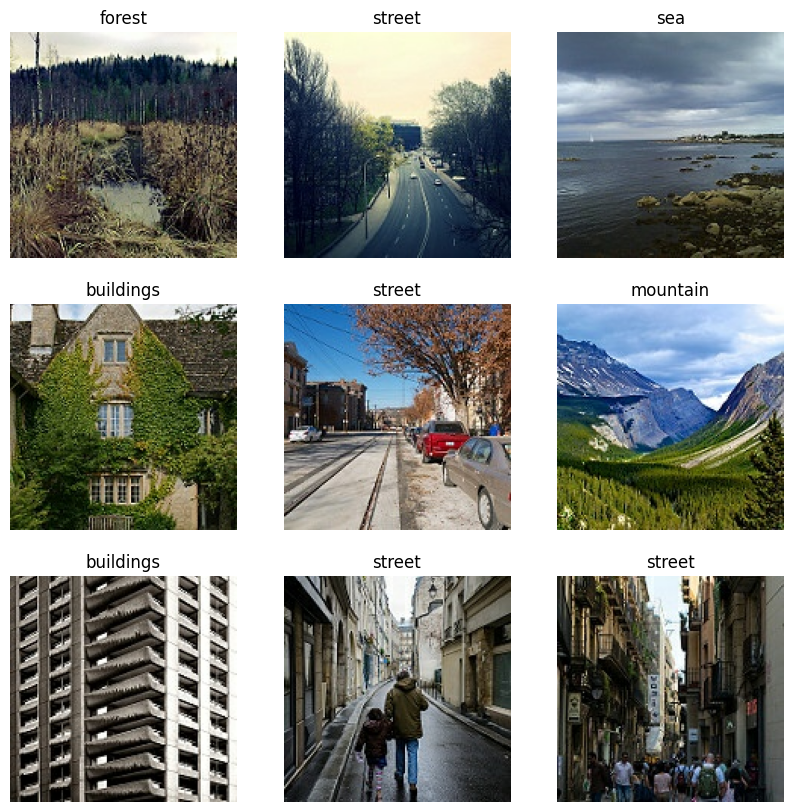

In [27]:
# Visualisation de certaines images dans le train

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### Data augmentation

Appliquer, dans le but d'améliorer la robustesse du modèle, les techniques suivantes: 
- la rotation,
- le zoom,
- le retournement horizontal (très pertinent ici)
- les variations de luminosité pour améliorer la robustesse du modèle.

In [2]:
# import des librairies
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2025-09-21 19:21:34.972459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758482495.156183      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758482495.212784      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [29]:
# Données d'entraimentement augmenté

img_size = (150, 150)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalisation pour mettre les données à la même échelle
    rotation_range=10,          # rotation +/- 10%
    zoom_range=0.1,             # zoom +/- 10%
    horizontal_flip=True,       # retournement horizontal
    brightness_range=[0.8,1.2]  # variation luminosité
)

In [8]:
# Données pour valider l'entrainement
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    seed=123,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    seed=123,
    target_size = img_size,
    batch_size = batch_size,
    shuffle=False,
    class_mode ="categorical"
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


**Remarque:** L'augmentation des données est effectuée uniquement sur les données pour le **train** pour permettre au modèle lors de son apprentissage d'avoir plusieurs réprésentation de l'image afin d'améliorer sa reconnaissance des images.

## Conception et Implémentation du Modèle CNN 


**Objectif : Construire un modèle CNN pour la classification des scènes naturelles**

**1. Premier Modèle**

Le modèle est construit en trois sections principales : l'extraction de caractéristiques, la classification, et la couche de sortie.

L'extraction de caractéristiques comprend : 

- Une couche de Conv2D qui utilise des filtres de 3x3 pour détecter des motifs dans les images. Le nombre de filtres augmente (32, 64, 128) à chaque bloc pour capturer des caractéristiques de plus en plus complexes.

- Une couche de MaxPooling2D qui réduit la taille des images pour diminuer la complexité du calcul et pour mieux résister aux petites variations.

- Une couche de BatchNormalization qui stabilise l'entraînement et accélère la convergence du modèle.



Après l'extraction de caractéristiques, le modèle prépare les données pour la classification :

- Une couche Flatten aplatit les données pour les transformer en un long vecteur.

- Une couche Dense de 256 neurones effectue la classification finale. Elle est régularisée avec L2 pour empêcher le sur-apprentissage.

- Une couche Dropout désactive aléatoirement 50 % des neurones pour renforcer la généralisation du modèle.


Enfin, la couche de sortie est une couche Dense de 6 neurones. Elle utilise **la fonction d'activation softmax** pour convertir les scores du modèle en probabilités, correspondant aux 6 classes d'images.


In [15]:
model = keras.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,712,774 (40.87 MB)

 Trainable params: 10,712,326 (40.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_generator,validation_data=test_generator,epochs=30)

Epoch 1/30


I0000 00:00:1758383208.707966     102 service.cc:148] XLA service 0x7a540c011fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758383208.709493     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758383208.709514     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758383209.266230     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/439 ━━━━━━━━━━━━━━━━━━━━ 1:19:09 11s/step - accuracy: 0.1875 - loss: 3.2854

I0000 00:00:1758383215.366363     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 ━━━━━━━━━━━━━━━━━━━━ 195s 420ms/step - accuracy: 0.4346 - loss: 4.6144 - val_accuracy: 0.5073 - val_loss: 2.0598
Epoch 2/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 104s 236ms/step - accuracy: 0.5219 - loss: 1.8918 - val_accuracy: 0.5377 - val_loss: 1.7430
Epoch 3/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 101s 230ms/step - accuracy: 0.5617 - loss: 1.5397 - val_accuracy: 0.7407 - val_loss: 1.1020
Epoch 4/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 103s 233ms/step - accuracy: 0.5876 - loss: 1.3639 - val_accuracy: 0.5873 - val_loss: 1.6505
Epoch 5/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 105s 238ms/step - accuracy: 0.6222 - loss: 1.2726 - val_accuracy: 0.7520 - val_loss: 1.0088
Epoch 6/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 105s 238ms/step - accuracy: 0.6614 - loss: 1.2095 - val_accuracy: 0.7163 - val_loss: 1.0958
Epoch 7/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 102s 233ms/step - accuracy: 0.6862 - loss: 1.1217 - val_accuracy: 0.7623 - val_loss: 1.0960
Epoch 8/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 104s 238ms/step - accuracy: 0.7130 - loss: 1.15

<Axes: >

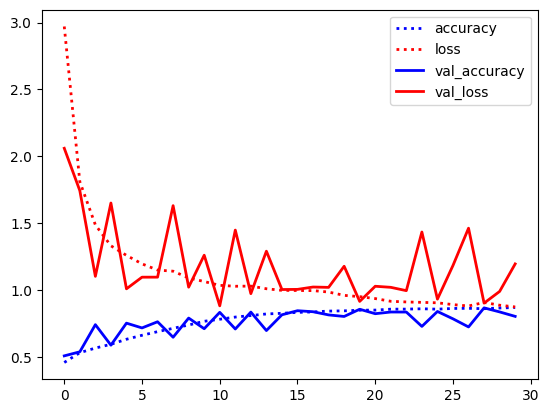

In [18]:
pd.DataFrame(history.history).plot(lw=2,style=['b:','r:','b-','r-'])

#### Métriques

In [16]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step


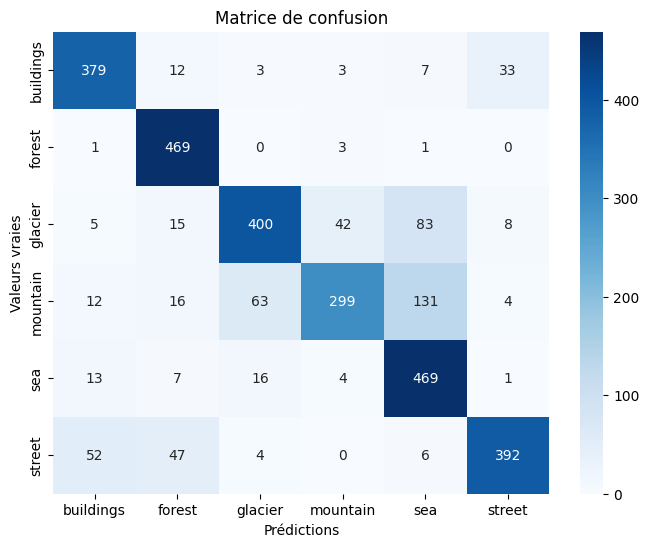

In [20]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# 2. Récupérer les vraies classes
y_true = test_generator.classes

# 3. Générer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Prédictions")
plt.ylabel("Valeurs vraies")
plt.title("Matrice de confusion")
plt.show()

La diagonale principale symbole les bonnes prédictions.
Les valeurs hors de la diagonale sont des erreurs du modèle.

On constate que les valeurs sur la diagionale sont plus élevé par rapport au reste.

In [21]:
# Rapport de classification
print(classification_report(y_true, y_pred,
                            target_names=list(test_generator.class_indices.keys())))

              precision    recall  f1-score   support

   buildings       0.82      0.87      0.84       437
      forest       0.83      0.99      0.90       474
     glacier       0.82      0.72      0.77       553
    mountain       0.85      0.57      0.68       525
         sea       0.67      0.92      0.78       510
      street       0.89      0.78      0.83       501

    accuracy                           0.80      3000
   macro avg       0.82      0.81      0.80      3000
weighted avg       0.82      0.80      0.80      3000



Le modèle confond plus les building aux street

In [22]:
misclassified_idx = np.where(y_true != y_pred)[0]

Nombre d'images mal classées : 592


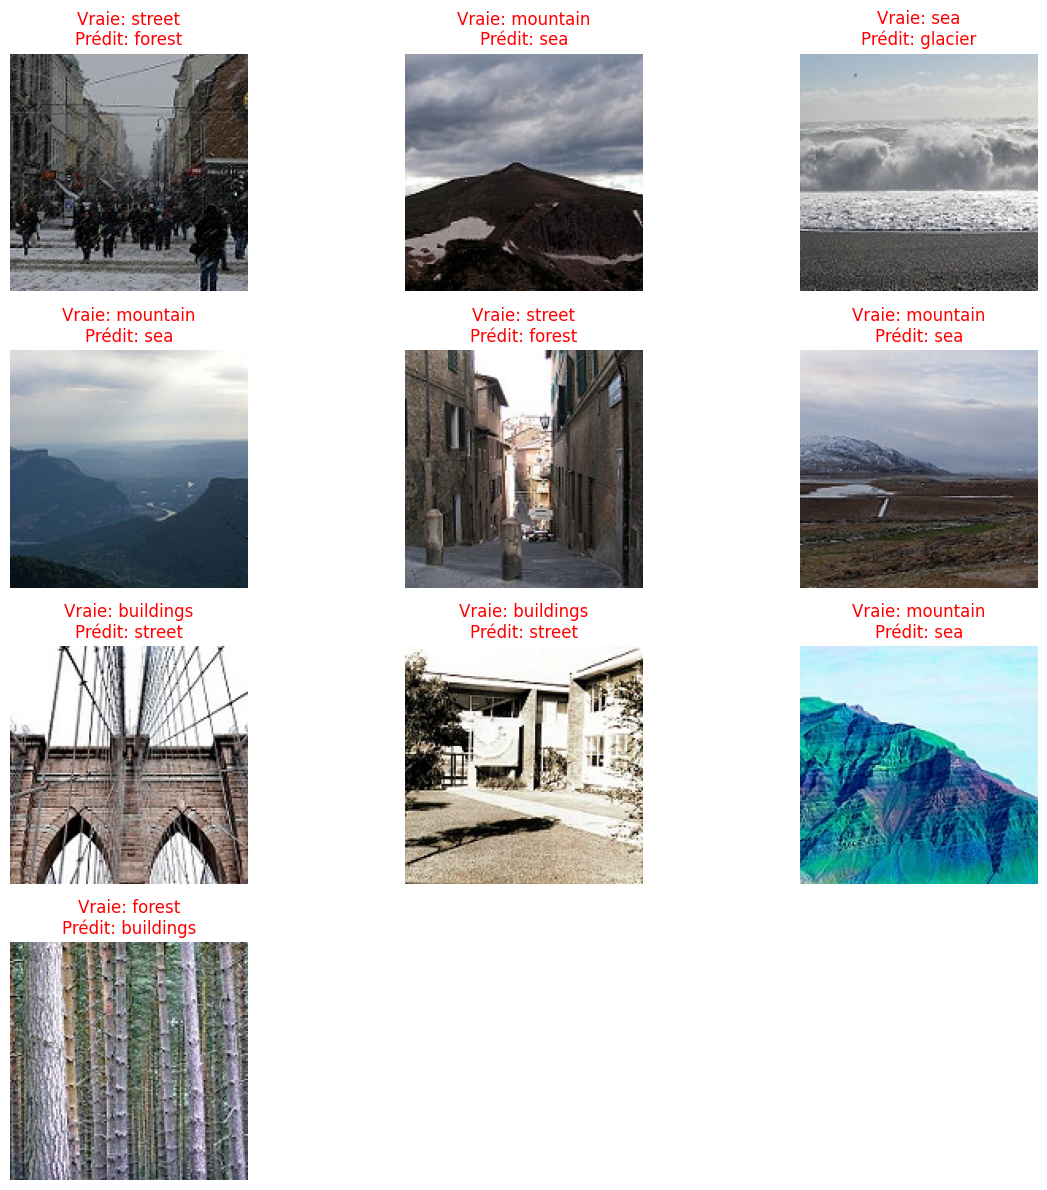

In [35]:
np.random.shuffle(misclassified_idx)
print(f"Nombre d'images mal classées : {len(misclassified_idx)}")

class_names = list(test_generator.class_indices.keys())
num_to_display = min(10, len(misclassified_idx))

plt.figure(figsize=(12, 12))
for i in range(num_to_display):
    # Récupérer l'indice de l'image dans le générateur
    idx = misclassified_idx [i]
    
    # Récupérer l'image originale
    # Les images sont en mémoire dans le générateur, on doit les extraire
    # par leur index global. C'est pourquoi shuffle=False est important.
    img_path = test_generator.filepaths[idx]
    original_img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
    original_img = tf.keras.preprocessing.image.img_to_array(original_img)
    
    # Obtenir les noms des classes
    true_label = class_names[y_true[idx]]
    predicted_label = class_names[y_pred[idx]]

    plt.subplot(4, 3, i + 1)
    plt.imshow(original_img / 255.) # Normaliser pour l'affichage
    plt.title(f"Vraie: {true_label}\nPrédit: {predicted_label}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [47]:
model.save('model_1_classifier_image_intel.h5')
print("Bien sauvegardé'")

Bien sauvegardé'


### Model_2


Le modèle est construit en trois sections principales : l'extraction de caractéristiques, la classification, et la couche de sortie.

1. Extraction de caractéristiques (Blocs de convolution)
Le modèle utilise trois blocs de couches pour détecter et extraire des caractéristiques de plus en plus complexes des images d'entrée (150x150 pixels avec 3 canaux de couleur).

- Bloc 1 : Deux couches Conv2D avec 32 filtres de taille 3x3. La première couche spécifie la forme d'entrée (input_shape). La fonction d'activation relu introduit la non-linéarité. Une couche MaxPooling2D de taille 2x2 est utilisée pour réduire la dimensionnalité spatiale des caractéristiques.

- Bloc 2 : Deux couches Conv2D avec 64 filtres chacune, suivies d'une couche MaxPooling2D.

- Bloc 3 : Deux couches Conv2D avec 128 filtres chacune, suivies d'une couche MaxPooling2D.

Le nombre de filtres augmente à chaque bloc, permettant au réseau d'apprendre des motifs plus abstraits et complexes.

2. Classification (Couches denses)
Après l'extraction des caractéristiques, le modèle prépare les données pour la classification.

- Une couche Flatten convertit la matrice de caractéristiques 2D en un long vecteur 1D.

- Une couche Dense de 128 neurones sert de couche cachée pour la classification. Elle utilise également l'activation relu.

- Une couche Dropout avec un taux de 0.5 désactive aléatoirement la moitié des neurones pendant l'entraînement, ce qui réduit le sur-apprentissage en empêchant le modèle de trop se fier à des neurones spécifiques.

3. Couche de sortie
La couche de sortie est une couche Dense de 6 neurones. Chaque neurone correspond à une classe de l'ensemble de données.

La fonction d'activation softmax est utilisée pour générer une distribution de probabilités sur les 6 classes. La classe avec la plus haute probabilité est la prédiction finale du modèle.

In [38]:
model_2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
    
    
])
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,596,326 (21.35 MB)

 Trainable params: 5,596,326 (21.35 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
history=model_2.fit(train_generator,validation_data=test_generator,epochs=30)

Epoch 1/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 138s 294ms/step - accuracy: 0.4814 - loss: 1.2703 - val_accuracy: 0.6620 - val_loss: 0.8429
Epoch 2/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 104s 238ms/step - accuracy: 0.6462 - loss: 0.8997 - val_accuracy: 0.7313 - val_loss: 0.7012
Epoch 3/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 106s 241ms/step - accuracy: 0.7084 - loss: 0.7695 - val_accuracy: 0.7273 - val_loss: 0.7565
Epoch 4/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 105s 239ms/step - accuracy: 0.7461 - loss: 0.6907 - val_accuracy: 0.7887 - val_loss: 0.5898
Epoch 5/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 105s 240ms/step - accuracy: 0.7730 - loss: 0.6214 - val_accuracy: 0.8187 - val_loss: 0.5049
Epoch 6/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 104s 236ms/step - accuracy: 0.8028 - loss: 0.5502 - val_accuracy: 0.8277 - val_loss: 0.5009
Epoch 7/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 104s 238ms/step - accuracy: 0.8166 - loss: 0.5127 - val_accuracy: 0.8403 - val_loss: 0.4524
Epoch 8/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 105s 239ms/step - accuracy: 0.8248 -

<Axes: >

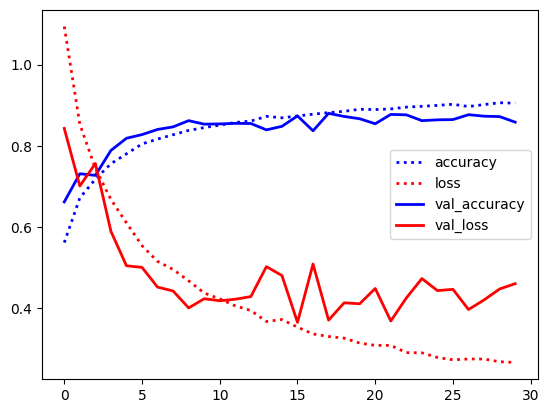

In [41]:
pd.DataFrame(history.history).plot(lw=2,style=['b:','r:','b-','r-'])

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step


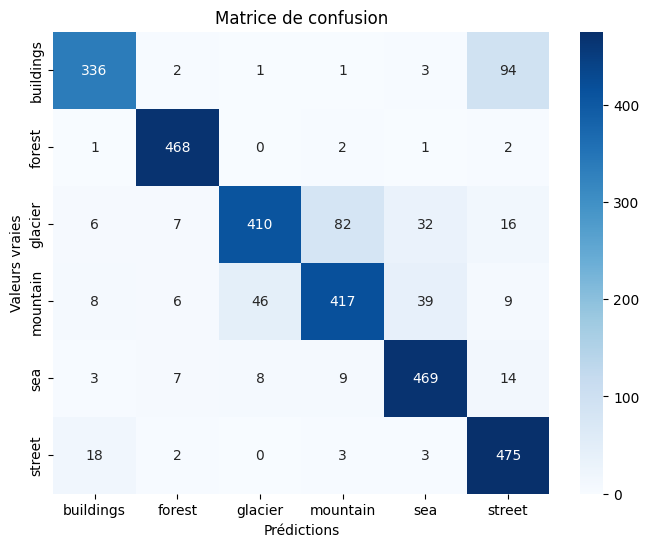

In [42]:
Y_pred = model_2.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# 2. Récupérer les vraies classes
y_true = test_generator.classes

# 3. Générer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Prédictions")
plt.ylabel("Valeurs vraies")
plt.title("Matrice de confusion")
plt.show()

In [43]:
# Rapport de classification
print(classification_report(y_true, y_pred,
                            target_names=list(test_generator.class_indices.keys())))

              precision    recall  f1-score   support

   buildings       0.90      0.77      0.83       437
      forest       0.95      0.99      0.97       474
     glacier       0.88      0.74      0.81       553
    mountain       0.81      0.79      0.80       525
         sea       0.86      0.92      0.89       510
      street       0.78      0.95      0.86       501

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



Nombre d'images mal classées : 425


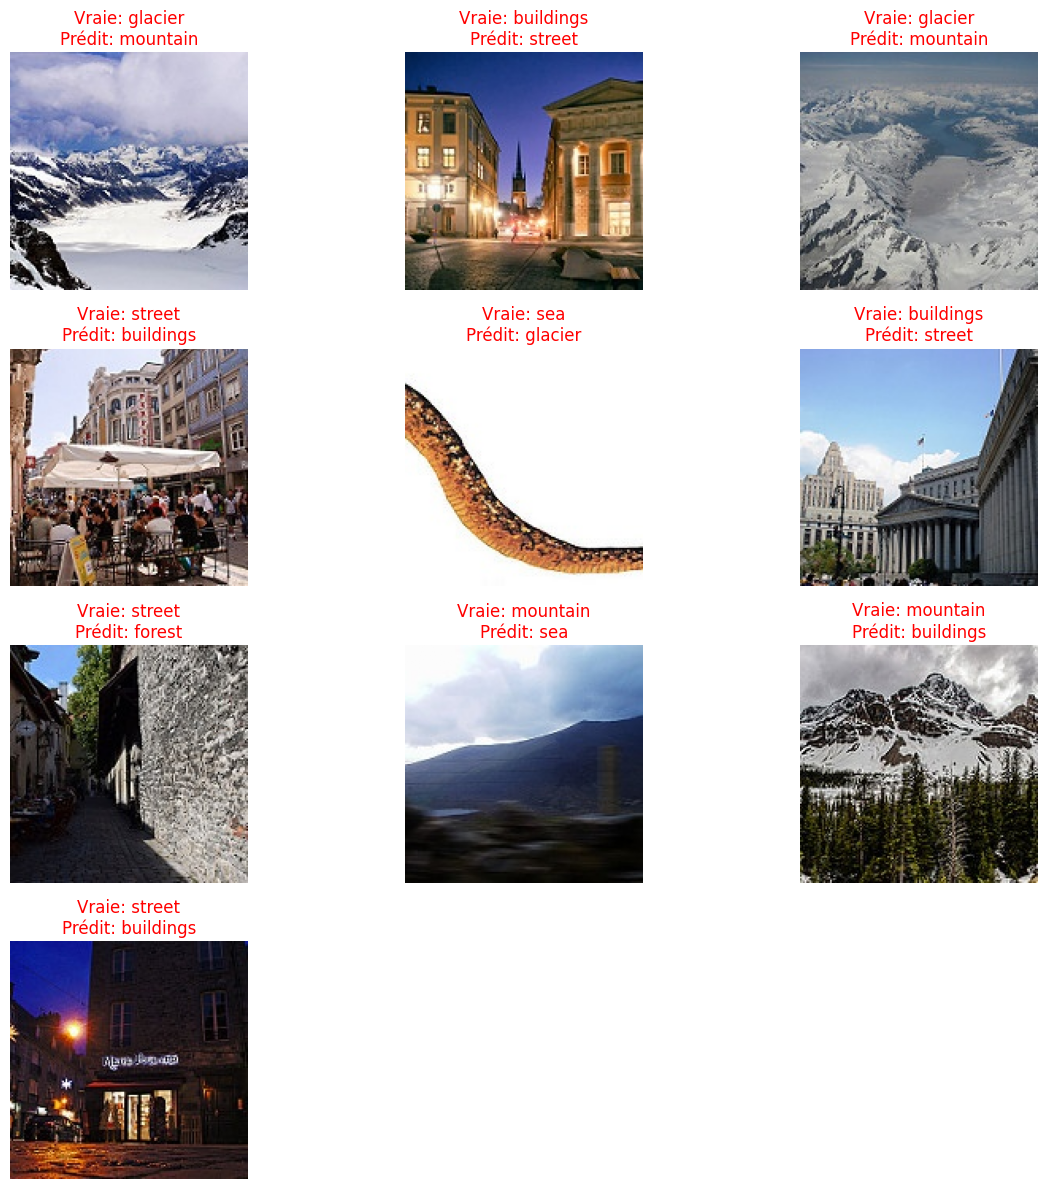

In [44]:
misclassified_idx = np.where(y_true != y_pred)[0]
np.random.shuffle(misclassified_idx)
print(f"Nombre d'images mal classées : {len(misclassified_idx)}")

class_names = list(test_generator.class_indices.keys())
num_to_display = min(10, len(misclassified_idx))

plt.figure(figsize=(12, 12))
for i in range(num_to_display):
    # Récupérer l'indice de l'image dans le générateur
    idx = misclassified_idx [i]
    
    # Récupérer l'image originale
    # Les images sont en mémoire dans le générateur, on doit les extraire
    # par leur index global. C'est pourquoi shuffle=False est important.
    img_path = test_generator.filepaths[idx]
    original_img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
    original_img = tf.keras.preprocessing.image.img_to_array(original_img)
    
    # Obtenir les noms des classes
    true_label = class_names[y_true[idx]]
    predicted_label = class_names[y_pred[idx]]

    plt.subplot(4, 3, i + 1)
    plt.imshow(original_img / 255.) # Normaliser pour l'affichage
    plt.title(f"Vraie: {true_label}\nPrédit: {predicted_label}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [46]:
model_2.save('model_classifier_image_intel.h5')
print("Bien sauvegardé'")

Bien sauvegardé'


In [52]:
# Trouver les indices où la prédiction est correcte
correct_indices = np.where(y_pred == y_true)[0]
# Compter le nombre d'images bien classées
nombre_correctement_classes = len(correct_indices)

# Trouver les indices où la prédiction est correcte
incorrect_indices = np.where(y_pred != y_true)[0]
# Compter le nombre d'images bien mal classées
nombre_mal_classes = len(incorrect_indices)

# Afficher le résultat
print(f"Nombre total d'images dans le jeu de test : {len(y_true)}")
print(f"Nombre d'images correctement classées : {nombre_correctement_classes}")
print(f"Nombre d'images mal classées : {nombre_mal_classes}")

Nombre total d'images dans le jeu de test : 3000
Nombre d'images correctement classées : 2575
Nombre d'images mal classées : 425


#### Modèle 3

1. Extraction de caractéristiques (couches de convolution)
Le modèle se compose de trois blocs de couches de convolution. Chaque bloc a pour but d'extraire des caractéristiques de plus en plus complexes de l'image.

Premier bloc :

- Une couche Conv2D avec 32 filtres de taille 3x3 pour détecter des motifs. L'entrée attend des images de 150x150 pixels avec 3 canaux de couleur. L'activation relu est utilisée pour l'introduction de la non-linéarité.

- Une couche MaxPooling2D de taille 2x2 réduit la dimension spatiale des caractéristiques.

Deuxième bloc :

- Une couche Conv2D avec 64 filtres.

- Une couche Dropout avec un taux de 0.5, qui désactive aléatoirement la moitié des neurones pour prévenir le sur-apprentissage.

- Une couche MaxPooling2D de 2x2 qui réduit à nouveau la taille.

Troisième bloc :

- Une couche Conv2D avec 128 filtres.

- Une couche Dropout avec un taux de 0.5.

- Une couche Conv2D avec 64 filtres qui suit la couche Dropout et a pour but d'extraire davantage de caractéristiques.

Une couche MaxPooling2D de 2x2.

2. Classification (couches denses)
Après l'extraction de caractéristiques, le modèle prépare les données pour la classification finale.

- Une couche Flatten convertit les données de la forme 2D à un long vecteur 1D.

- Une couche Dense de 128 neurones est utilisée pour la classification. Elle inclut une régularisation L2 pour pénaliser les poids trop élevés et éviter l'overfitting.

Une couche Dropout avec un taux de 0.5 est ajoutée pour améliorer la généralisation du modèle.

3. Couche de sortie
- La dernière couche est une couche Dense de 6 neurones, correspondant au nombre de classes à prédire.

- La fonction d'activation softmax est utilisée pour convertir les sorties en une distribution de probabilités, où la somme des probabilités de toutes les classes est égale à 1.

In [9]:
model_3 = keras.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

model_3.summary()

I0000 00:00:1758398686.345239      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,822,150 (10.77 MB)

 Trainable params: 2,822,150 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model_3.fit(train_generator,validation_data=test_generator,epochs=30)

Epoch 1/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 202ms/step - accuracy: 0.8428 - loss: 0.5589 - val_accuracy: 0.8607 - val_loss: 0.5104
Epoch 2/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 202ms/step - accuracy: 0.8360 - loss: 0.5766 - val_accuracy: 0.8533 - val_loss: 0.5399
Epoch 3/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 199ms/step - accuracy: 0.8470 - loss: 0.5551 - val_accuracy: 0.8603 - val_loss: 0.5349
Epoch 4/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 197ms/step - accuracy: 0.8521 - loss: 0.5600 - val_accuracy: 0.8710 - val_loss: 0.5085
Epoch 5/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 199ms/step - accuracy: 0.8540 - loss: 0.5454 - val_accuracy: 0.8577 - val_loss: 0.5420
Epoch 6/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 86s 197ms/step - accuracy: 0.8527 - loss: 0.5393 - val_accuracy: 0.8643 - val_loss: 0.4976
Epoch 7/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 198ms/step - accuracy: 0.8581 - loss: 0.5475 - val_accuracy: 0.8617 - val_loss: 0.5324
Epoch 8/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 199ms/step - accuracy: 0.8585 - loss: 0

<Axes: >

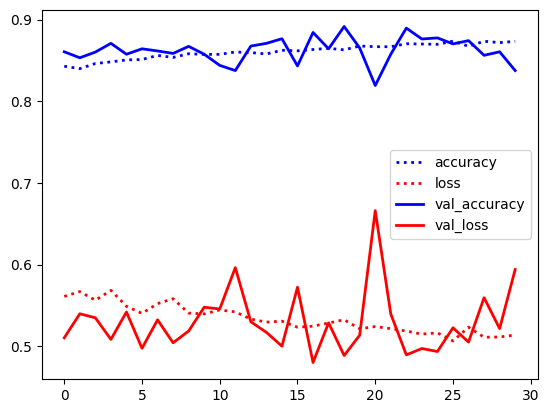

In [13]:
pd.DataFrame(history.history).plot(lw=2,style=['b:','r:','b-','r-'])

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


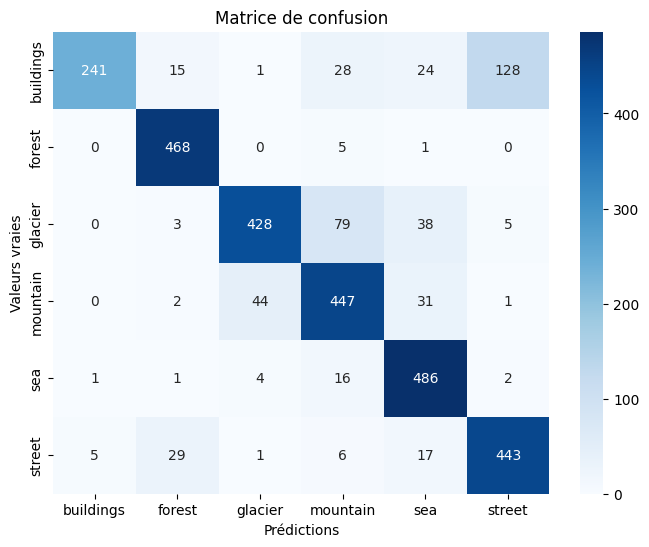

In [17]:
Y_pred = model_3.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# 2. Récupérer les vraies classes
y_true = test_generator.classes

# 3. Générer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Prédictions")
plt.ylabel("Valeurs vraies")
plt.title("Matrice de confusion")
plt.show()

In [18]:
# Rapport de classification
print(classification_report(y_true, y_pred,
                            target_names=list(test_generator.class_indices.keys())))

              precision    recall  f1-score   support

   buildings       0.98      0.55      0.70       437
      forest       0.90      0.99      0.94       474
     glacier       0.90      0.77      0.83       553
    mountain       0.77      0.85      0.81       525
         sea       0.81      0.95      0.88       510
      street       0.77      0.88      0.82       501

    accuracy                           0.84      3000
   macro avg       0.85      0.83      0.83      3000
weighted avg       0.85      0.84      0.83      3000



### Transfert Learning

In [19]:

from tensorflow.keras.applications import VGG16

# Charger le modèle VGG16 pré-entraîné sur ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du modèle de base
# Cela empêche leurs poids d'être mis à jour pendant l'entraînement,
# car VGG16 agit comme un extracteur de caractéristiques.
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [22]:
from tensorflow.keras.models import Model

In [28]:
# Obtenir la sortie du modèle de base
x = base_model.output

# Aplatir la sortie pour la passer aux couches denses
x = layers.Flatten()(x)

# Ajouter vos couches denses
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation='softmax')(x)

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=predictions)

In [29]:
# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher un résumé de l'architecture du modèle
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,813,638 (64.14 MB)

 Trainable params: 2,098,950 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [30]:
# Entraîner le modèle
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 95s 209ms/step - accuracy: 0.7097 - loss: 0.7908 - val_accuracy: 0.8503 - val_loss: 0.4012
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 204ms/step - accuracy: 0.8307 - loss: 0.4609 - val_accuracy: 0.8607 - val_loss: 0.3667
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 202ms/step - accuracy: 0.8451 - loss: 0.4227 - val_accuracy: 0.8690 - val_loss: 0.3381
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 204ms/step - accuracy: 0.8544 - loss: 0.3865 - val_accuracy: 0.8730 - val_loss: 0.3348
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 204ms/step - accuracy: 0.8544 - loss: 0.3868 - val_accuracy: 0.8680 - val_loss: 0.3312
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 203ms/step - accuracy: 0.8650 - loss: 0.3631 - val_accuracy: 0.8743 - val_loss: 0.3331
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 204ms/step - accuracy: 0.8712 - loss: 0.3462 - val_accuracy: 0.8743 - val_loss: 0.3217
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 205ms/step - accuracy: 0.8715 - loss: 0

<Axes: >

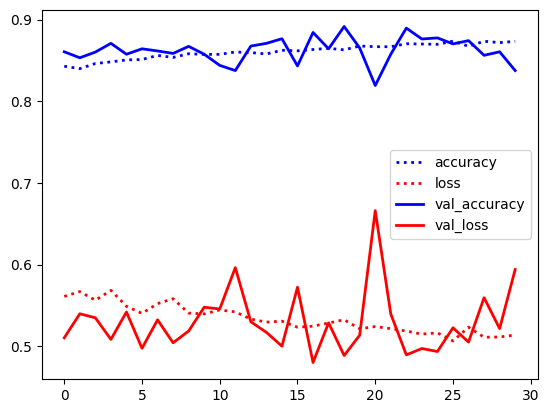

In [26]:
pd.DataFrame(history.history).plot(lw=2,style=['b:','r:','b-','r-'])

## Interprétation et Visualisation des Résultats

In [46]:
from tensorflow.keras.preprocessing import image
import cv2

# Chargement des images
img_path = '/kaggle/input/intel-image-classification/seg_train/seg_train/street/10019.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0 # Normaliser l'image

In [40]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
   
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Enregistrer le calcul des gradients
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculer le gradient du canal de sortie par rapport à la dernière couche de convolution
    grads = tape.gradient(class_channel, last_conv_layer_output)
    
    # Calculer la moyenne de l'activation pour chaque filtre
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiplier chaque canal de la carte de caractéristiques par l'importance de ce canal
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Appliquer ReLU pour ne garder que les gradients positifs
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

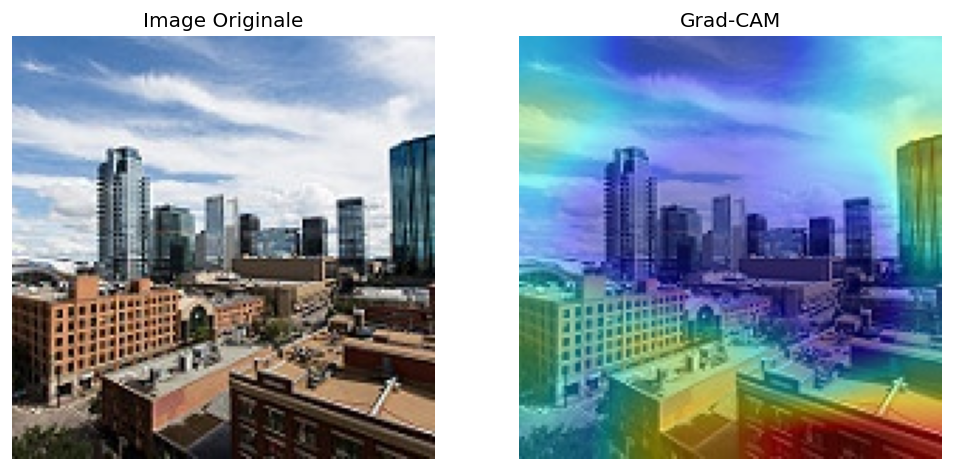

In [43]:
last_conv_layer_name = 'block5_conv3'

# Générer la carte thermique
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Créer la superposition de la carte thermique sur l'image
def save_and_display_gradcam(img_path, heatmap):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    # Afficher les images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Image Originale')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')

    plt.show()

# Appeler la fonction pour visualiser
save_and_display_gradcam(img_path, heatmap)

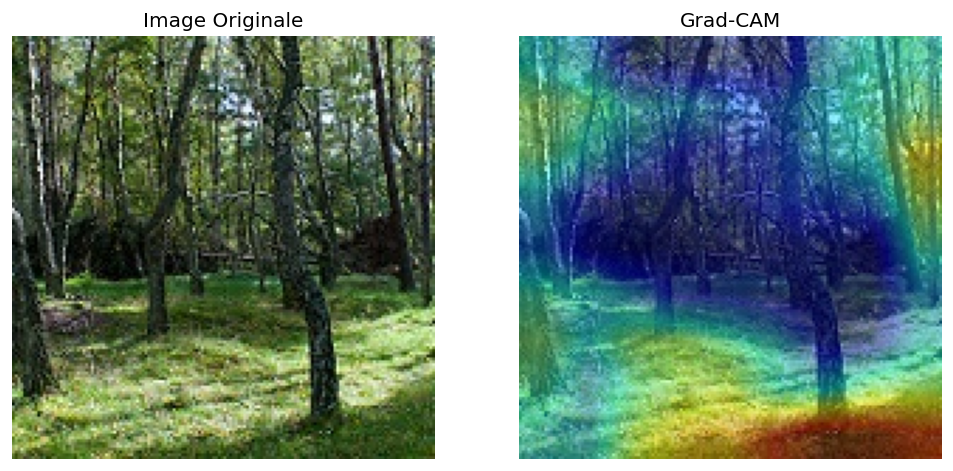

In [45]:
# Appeler la fonction pour visualiser
save_and_display_gradcam(img_path, heatmap)

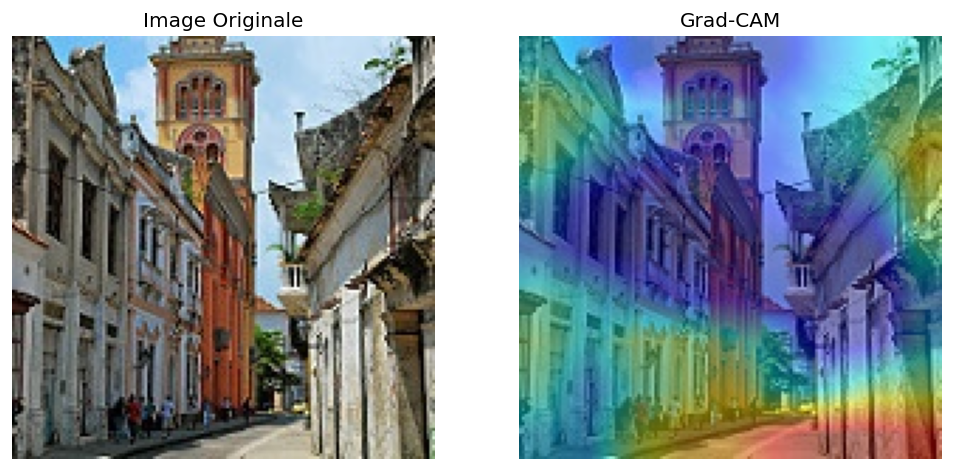

In [47]:
# Appeler la fonction pour visualiser
save_and_display_gradcam(img_path, heatmap)